In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../'))

In [18]:
from task_vectors import TaskVector
from evaluation import eval_single_dataset

In [17]:
pretrained_checkpoint = f'artificial_checkpoints/mlp_model.pth'
finetuned_checkpoint = f'artificial_checkpoints/mlp_model_dataset2.pth'
dataset = 'dataset2'
device = 'cpu'

In [5]:
task_vector = TaskVector(
            pretrained_checkpoint=pretrained_checkpoint,
            finetuned_checkpoint=finetuned_checkpoint,
            operation='subtract',
        )

In [24]:
results = []
for operation in ['subtract', 'add', 'multiply', 'divide']:
    task_vector = TaskVector(
            pretrained_checkpoint=pretrained_checkpoint,
            finetuned_checkpoint=finetuned_checkpoint,
            operation=operation,
        )
    for i in range(10):
        print(f"Iteration {i+1}")
        model_backbone = task_vector.apply_to(pretrained_checkpoint, 0.1*i)
        acc = eval_single_dataset(model_backbone, dataset, device)
        results.append((operation, i, acc))


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


In [26]:
# create a DataFrame to store the results
import pandas as pd
results_df = pd.DataFrame(results, columns=['operation', 'iteration', 'accuracy'])


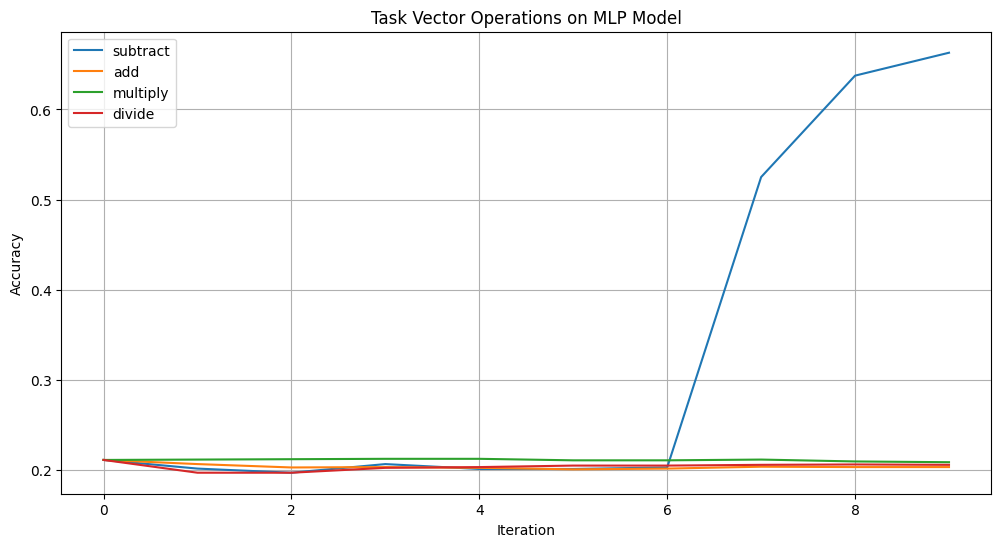

In [28]:
# make a plot of the results with a line for each operation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for operation in results_df['operation'].unique():
    subset = results_df[results_df['operation'] == operation]
    plt.plot(subset['iteration'], subset['accuracy'], label=operation)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Task Vector Operations on MLP Model')
plt.legend()
plt.grid()
plt.show()